# Prediction of house prices in Stockholm

In [1]:
import pandas as pd

df = pd.read_csv("data/stockholm_house_price.csv")
df.head()

,asked_price,final_price,pourcentage_difference,land_area,area,commune,price_per_area,rooms,supplemental_area
0,6475000.0,6950000,7.0,635.0,117.0,"Hässelby Södra Villastad, Stockholms kommun",59402.0,5.0,44.0
1,9950000.0,11300000,14.0,882.0,195.0,"Mälarhöjden - Hägersten, Stockholms kommun",57949.0,5.0,22.0
2,5795000.0,6200000,7.0,1224.0,90.0,"Segeltorp, Huddinge kommun",68889.0,6.0,90.0
3,11950000.0,12700000,6.0,542.0,110.0,"Gamla Enskede, Stockholms kommun",115455.0,5.0,48.0
4,7950000.0,8100000,2.0,690.0,157.0,"Skärholmshöjden., Stockholms kommun",51592.0,6.0,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   asked_price             500 non-null    float64
 1   final_price             500 non-null    int64  
 2   pourcentage_difference  500 non-null    float64
 3   land_area               495 non-null    float64
 4   area                    499 non-null    float64
 5   commune                 500 non-null    object 
 6   price_per_area          499 non-null    float64
 7   rooms                   490 non-null    float64
 8   supplemental_area       500 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 35.3+ KB


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(['final_price'], axis=1)
X

,asked_price,pourcentage_difference,land_area,area,commune,price_per_area,rooms,supplemental_area
0,6475000.0,7.0,635.0,117.0,"Hässelby Södra Villastad, Stockholms kommun",59402.0,5.0,44.0
1,9950000.0,14.0,882.0,195.0,"Mälarhöjden - Hägersten, Stockholms kommun",57949.0,5.0,22.0
2,5795000.0,7.0,1224.0,90.0,"Segeltorp, Huddinge kommun",68889.0,6.0,90.0
3,11950000.0,6.0,542.0,110.0,"Gamla Enskede, Stockholms kommun",115455.0,5.0,48.0
4,7950000.0,2.0,690.0,157.0,"Skärholmshöjden., Stockholms kommun",51592.0,6.0,0.0
...,...,...,...,...,...,...,...,...
495,9500000.0,24.0,624.0,164.0,"Älvsjö/Långbro, Stockholms kommun",71707.0,8.0,70.0
496,7295000.0,0.0,618.0,125.0,"Sätra, Stockholms kommun",58360.0,NaN,81.0
497,9795000.0,4.0,700.0,172.0,"Skälby, Järfälla kommun",59302.0,6.0,36.0
498,11950000.0,9.0,1307.0,174.0,"Töjnan, Sollentuna kommun",74713.0,8.0,90.0


In [4]:
y = df['final_price']
y

0       6950000
1      11300000
2       6200000
3      12700000
4       8100000
         ...   
495    11760000
496     7295000
497    10200000
498    13000000
499    15000000
Name: final_price, Length: 500, dtype: int64

In [5]:
# Training Data 
X_train, X_test, y_train, y_test = train_test_split(X.fillna(5), y, test_size=0.2, random_state=42) # 80% Training data - 20% Testing data
train_data = X_train.join(y_train)
train_data

,asked_price,pourcentage_difference,land_area,area,commune,price_per_area,rooms,supplemental_area,final_price
249,8550000.0,15.0,396.0,150.0,"Stora Ursvik, Sundbybergs kommun",65333.0,5.0,0.0,9800000
433,6495000.0,15.0,575.0,67.0,"Vällingby - Råcksta, Stockholms kommun",111940.0,5.0,67.0,7500000
19,7495000.0,0.0,980.0,157.0,"Nälsta, Stockholms kommun",47739.0,5.0,7.0,7495000
322,19000000.0,0.0,573.0,206.0,"Ålsten, Stockholms kommun",92233.0,7.0,95.0,19000000
332,5850000.0,8.0,1262.0,127.0,"Fornudden-Persudde, Tyresö kommun",49606.0,5.0,82.0,6300000
...,...,...,...,...,...,...,...,...,...
106,6995000.0,44.0,665.0,136.0,"Sköndal - Kakstan, Stockholms kommun",74265.0,6.0,53.0,10100000
270,9995000.0,2.0,1082.0,250.0,"Fornudden-Persudde, Tyresö kommun",40800.0,8.0,146.0,10200000
348,9900000.0,11.0,1206.0,200.0,"Barkarby, Järfälla kommun",55000.0,7.0,118.0,11000000
435,8995000.0,8.0,939.0,235.0,"Fornudden, Tyresö kommun",41277.0,7.0,33.0,9700000


In [6]:
X_test

,asked_price,pourcentage_difference,land_area,area,commune,price_per_area,rooms,supplemental_area
361,7125000.0,23.0,910.0,165.0,"Stortorp, Huddinge kommun",53030.0,6.0,61.0
73,8750000.0,5.0,475.0,95.0,"Bromma Nockebyhov, Stockholms kommun",96842.0,5.0,49.0
374,14000000.0,0.0,1100.0,144.0,"Mälarhöjden, Stockholms kommun",97222.0,7.0,50.0
155,6495000.0,2.0,663.0,119.0,"Spånga Bromsten, Stockholms kommun",55882.0,5.0,0.0
104,7150000.0,2.0,683.0,146.0,"Vinsta, Stockholms kommun",49829.0,6.0,0.0
...,...,...,...,...,...,...,...,...
347,11000000.0,0.0,562.0,101.0,"Norra Ängby, Stockholms kommun",108911.0,5.0,50.0
86,5000000.0,0.0,814.0,117.0,"Farsta, Stockholms kommun",42735.0,5.0,26.0
75,14900000.0,1.0,265.0,157.0,"Bromma Smedslätten, Stockholms kommun",94427.0,7.0,71.0
438,8495000.0,15.0,336.0,92.0,"Tallkrogen, Stockholms kommun",105978.0,5.0,51.0


In [7]:
y_test

361     8750000
73      9200000
374    14000000
155     6650000
104     7275000
         ...   
347    11000000
86      5000000
75     14825000
438     9750000
15      6995000
Name: final_price, Length: 100, dtype: int64

array([[<Axes: title={'center': 'asked_price'}>,
        <Axes: title={'center': 'pourcentage_difference'}>,
        <Axes: title={'center': 'land_area'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'price_per_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'supplemental_area'}>,
        <Axes: title={'center': 'final_price'}>, <Axes: >]], dtype=object)

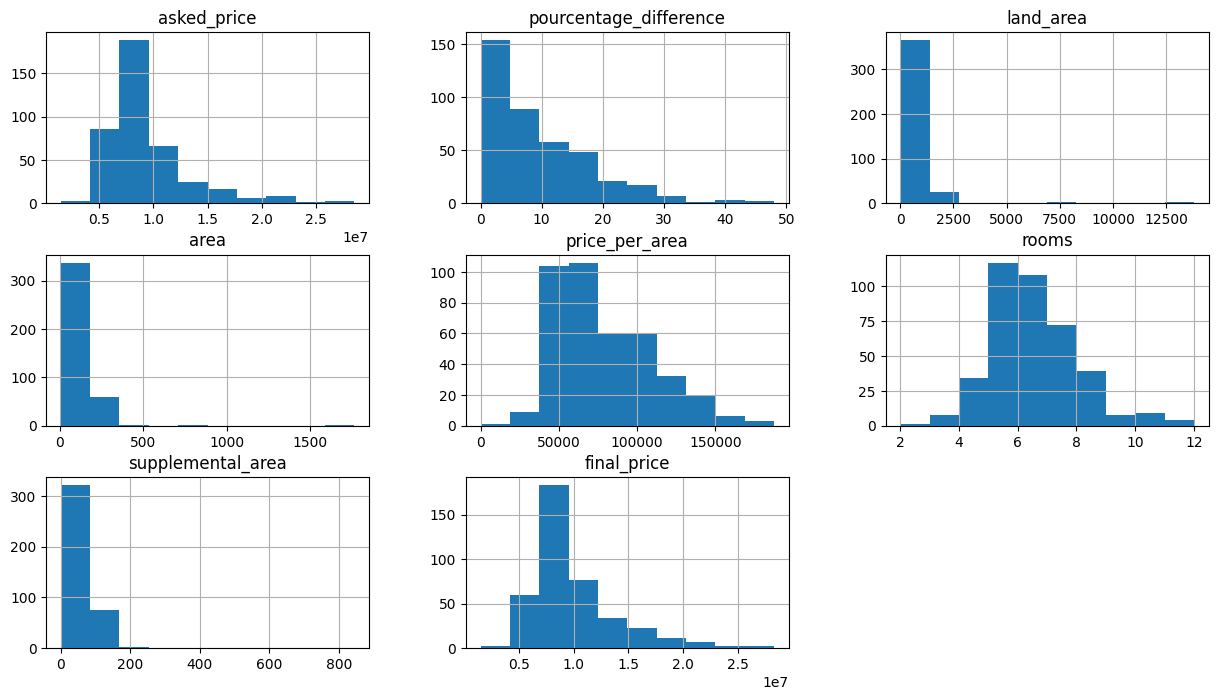

In [8]:
train_data.hist(figsize=(15,8))

# Random Forest Regressor

- Combines the predictions from multiple decision trees to produce a more accurate and stable prediction.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Identify column types
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(include=['number']).columns

print("Categorical columns:", list(categorical_cols))
print("Numeric columns:", list(numeric_cols))

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Pipeline
pipeline_forest = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1 
    ))
])

# Train
pipeline_forest.fit(X_train, y_train)

# Predict & evaluate
predictions = pipeline_forest.predict(X_test)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f'R2 Score: {r2:.2f}%') 
print(f'MAE: {mae:.2f} SEK') 


Categorical columns: ['commune']
Numeric columns: ['asked_price', 'pourcentage_difference', 'land_area', 'area', 'price_per_area', 'rooms', 'supplemental_area']
R2 Score: 0.93%
MAE: 419335.75 SEK


# Linear Regression

- Targets prediction value based on independent variables. 
- Models the relationship between input features (X) and a continuous target variable (y) by fitting a straight line.  

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import joblib


categorical_cols = X_train.select_dtypes(include=["object"]).columns
numeric_cols = X_train.select_dtypes(include=["number"]).columns

print("Categorical columns:", list(categorical_cols))
print("Numeric columns:", list(numeric_cols))

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols), 
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols) # Converts categorical cols into binary format to ensure it can be effectively in linear regresion model
    ]                                                  
)

# Linear Regression pipeline
pipeline_lineal = Pipeline([
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

# Train
pipeline_lineal.fit(X_train, y_train)

# Predict and evaluate
pred = pipeline_lineal.predict(X_test)
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)

print(f"R2 Score: {r2:.2f}%") # 99% of price variation
print(f"MAE: {mae:.2f} SEK") # 317 000 kr

# Save the pipeline for our predictions
model_ml = "models/stockholm_house_price.pkl"
joblib.dump(pipeline_lineal, model_ml)
X_test.to_csv("data/X_testing.csv", index=False)
save = pd.DataFrame({"y_true": y_test, "y_pred": pred}).to_csv("data/predictions.csv", index=False) # Loading our predictions into a CSV-file

Categorical columns: ['commune']
Numeric columns: ['asked_price', 'pourcentage_difference', 'land_area', 'area', 'price_per_area', 'rooms', 'supplemental_area']
R2 Score: 0.99%
MAE: 317293.58 SEK


# Decision Tree Regression

- Used to predict continuous values such as prices or scores using a tree-like structure.
- Splits the data into smaller groups based on simple rules derived from input features, helping reduce prediction errors.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error


categorical_cols = X_train.select_dtypes(include=["object"]).columns
numeric_cols = X_train.select_dtypes(include=["number"]).columns

print("Categorical columns:", list(categorical_cols))
print("Numeric columns:", list(numeric_cols))

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

pipeline_tree = Pipeline([
    ("preprocess", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])
pipeline_tree.fit(X_train, y_train)


predict = pipeline_tree.predict(X_test)
r2 = r2_score(y_test, predict)
mae = mean_absolute_error(y_test, predict)
print(f"R2 Score: {r2:.2f}%") # 92% of price variation
print(f"MAE: {mae:.2f} SEK")

Categorical columns: ['commune']
Numeric columns: ['asked_price', 'pourcentage_difference', 'land_area', 'area', 'price_per_area', 'rooms', 'supplemental_area']
R2 Score: 0.92%
MAE: 489120.00 SEK
